In [ ]:
#importing neccesary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
url = "/content/drive/MyDrive/Colab Notebooks/data/mobile_price_data.csv"
df = pd.read_csv(url)
df.head()


,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [ ]:
# EDA and visualisationg

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [ ]:
df.isnull().sum()

mobile_name      0
mobile_price     0
mobile_color     0
dual_sim         0
disp_size        0
resolution       0
os               0
num_cores        0
mp_speed         0
int_memory       0
ram              0
p_cam            0
f_cam            0
network          0
bluetooth        0
battery_power    0
mob_width        0
mob_height       0
mob_depth        0
mob_weight       0
dtype: int64

In [ ]:
df.shape

(459, 20)

In [ ]:
df["mobile_name"].value_counts()

Vivo Z1Pro (Sonic Black, 64 GB)           4
Vivo U10 (Thunder Black, 64 GB)           4
Vivo U10 (Electric Blue, 64 GB)           3
Mi A2 (Red, 64 GB)                        3
Redmi Note 5 Pro (Black, 64 GB)           3
                                         ..
Redmi K20 (Flame Red, 64 GB)              1
Redmi Note 7 (Sapphire Blue, 32 GB)       1
Redmi Y3 (Prime Black, 32 GB)             1
Redmi Y3 (Elegant Blue, 32 GB)            1
OPPO Reno 10x Zoom (Jet Black, 128 GB)    1
Name: mobile_name, Length: 363, dtype: int64

In [ ]:
# Dropping duplicate counts
df.drop_duplicates(subset=['mobile_name',], inplace = True)
df.drop(axis = 1, columns = ['mobile_color', 'resolution'],inplace = True)

In [ ]:
# converting columns and preprocessing of data
df.mobile_price = df.mobile_price.str.replace('₹','').str.replace(',','').astype('int')
df.disp_size = df.disp_size.str[:5].astype('float')
df.mp_speed = df.mp_speed.str.replace(' GHz','').astype('float')
df.ram = df.ram.str.replace(' GB','').astype('int')
df.int_memory = df.int_memory.str.replace(' GB','').astype('int')
df.battery_power = df.battery_power.str.replace(' mAh','').astype('int')
df.mob_width = df.mob_width.str.replace(' mm','').astype('float')
df.mob_height = df.mob_height.str.replace(' mm','').astype('float')
df.mob_depth = df.mob_depth.str.replace(' mm','').astype('float')
df.mob_weight = df.mob_weight.str.replace(' g','').astype('float')
df["highest_network"] = df.network.str[:2]
df.p_cam = df.p_cam.str.replace('MP',' ')
df.p_cam = df.p_cam.str[:3].astype('int')
df.f_cam = df.f_cam.str.replace('MP',' ')
df.f_cam = df.f_cam.str[:3].astype('int')
#mapping values (encoding) 
mappsim = {'Dual Sim':1,'Single Sim':0}
df.dual_sim = df.dual_sim.map(mappsim)

mappos = {'Android 10':10, 'Android Pie 9.0':9, 'Android Pie 9':9,
       'Android Oreo 8.1':8, 'Android Pie 10':10, 'Android Nougat 7.1.1':7,
       'Android Oreo 8.0':8, 'Android Nougat 7.1.2':7, 'Android KitKat 4.4.2':4,
       'Android Marshmallow 6.0.1':6, 'Android Nougat 7.1':7,
       'Android Marshmallow 6':6, 'Android Nougat 7':7,
       'Android Lollipop 5.4.1':5, 'Android Oreo 8.1.0':8, 'Android Oreo 8':8,
       'Android Lollipop 5.1':5, 'Android Lollipop 5.1.1':5}
df.os = df.os.map(mappos)

mappcore = {'Octa Core':8,'Quad Core':4,'Single Core':1}
df.num_cores = df.num_cores.map(mappcore)

mappbluetooth = {'Yes':1,'No':0}
df.bluetooth = df.bluetooth.map(mappbluetooth)
mappnetwork = {'2G':2 ,'3G':3,'4G':4,'5G':5 }
df.highest_network = df.highest_network.map(mappnetwork)


In [ ]:
df.mp_speed.unique()

array([2.   , 2.3  , 2.96 , 1.95 , 2.8  , 2.05 , 2.2  , 2.1  , 2.84 ,
       2.5  , 1.8  , 1.4  , 1.5  , 1.3  , 1.6  , 2.39 , 2.6  , 2.649])

In [ ]:
df.mp_speed
df.dual_sim
df.os
df.ram
df.mob_height
df.battery_power.unique()
df.mob_width.unique()
df.mob_weight.unique()
df.mobile_name.unique()
df.p_cam.unique()
df.network.unique()
df.highest_network.unique()

array([4, 3, 5, 2])

In [ ]:
df.head()

,mobile_name,mobile_price,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,highest_network
0,"Realme Narzo 10A (So White, 32 GB)",8999,1,16.56,10,8,2.0,32,3,12,5,"4G VOLTE, 4G, 3G, 2G",1,5000,75.0,164.4,8.95,195.0,4
1,"Realme Narzo 10A (So Blue, 32 GB)",8999,1,16.56,10,8,2.0,32,3,12,5,"4G VOLTE, 4G, 3G, 2G",1,5000,75.0,164.4,8.95,195.0,4
2,"Realme Narzo 10A (So Blue, 64 GB)",9999,1,16.56,10,8,2.0,64,4,12,5,"4G VOLTE, 4G, 3G, 2G",1,5000,75.0,164.4,8.95,195.0,4
3,"Realme Narzo 10A (So White, 64 GB)",9999,1,16.56,10,8,2.0,64,4,12,5,"4G VOLTE, 4G, 3G, 2G",1,5000,75.0,164.4,8.95,195.0,4
4,"Realme Narzo 10 (That Green, 128 GB)",11999,1,16.51,10,8,2.0,128,4,48,16,"4G VOLTE, 4G, 3G, 2G",1,5000,75.4,164.4,9.00,199.0,4


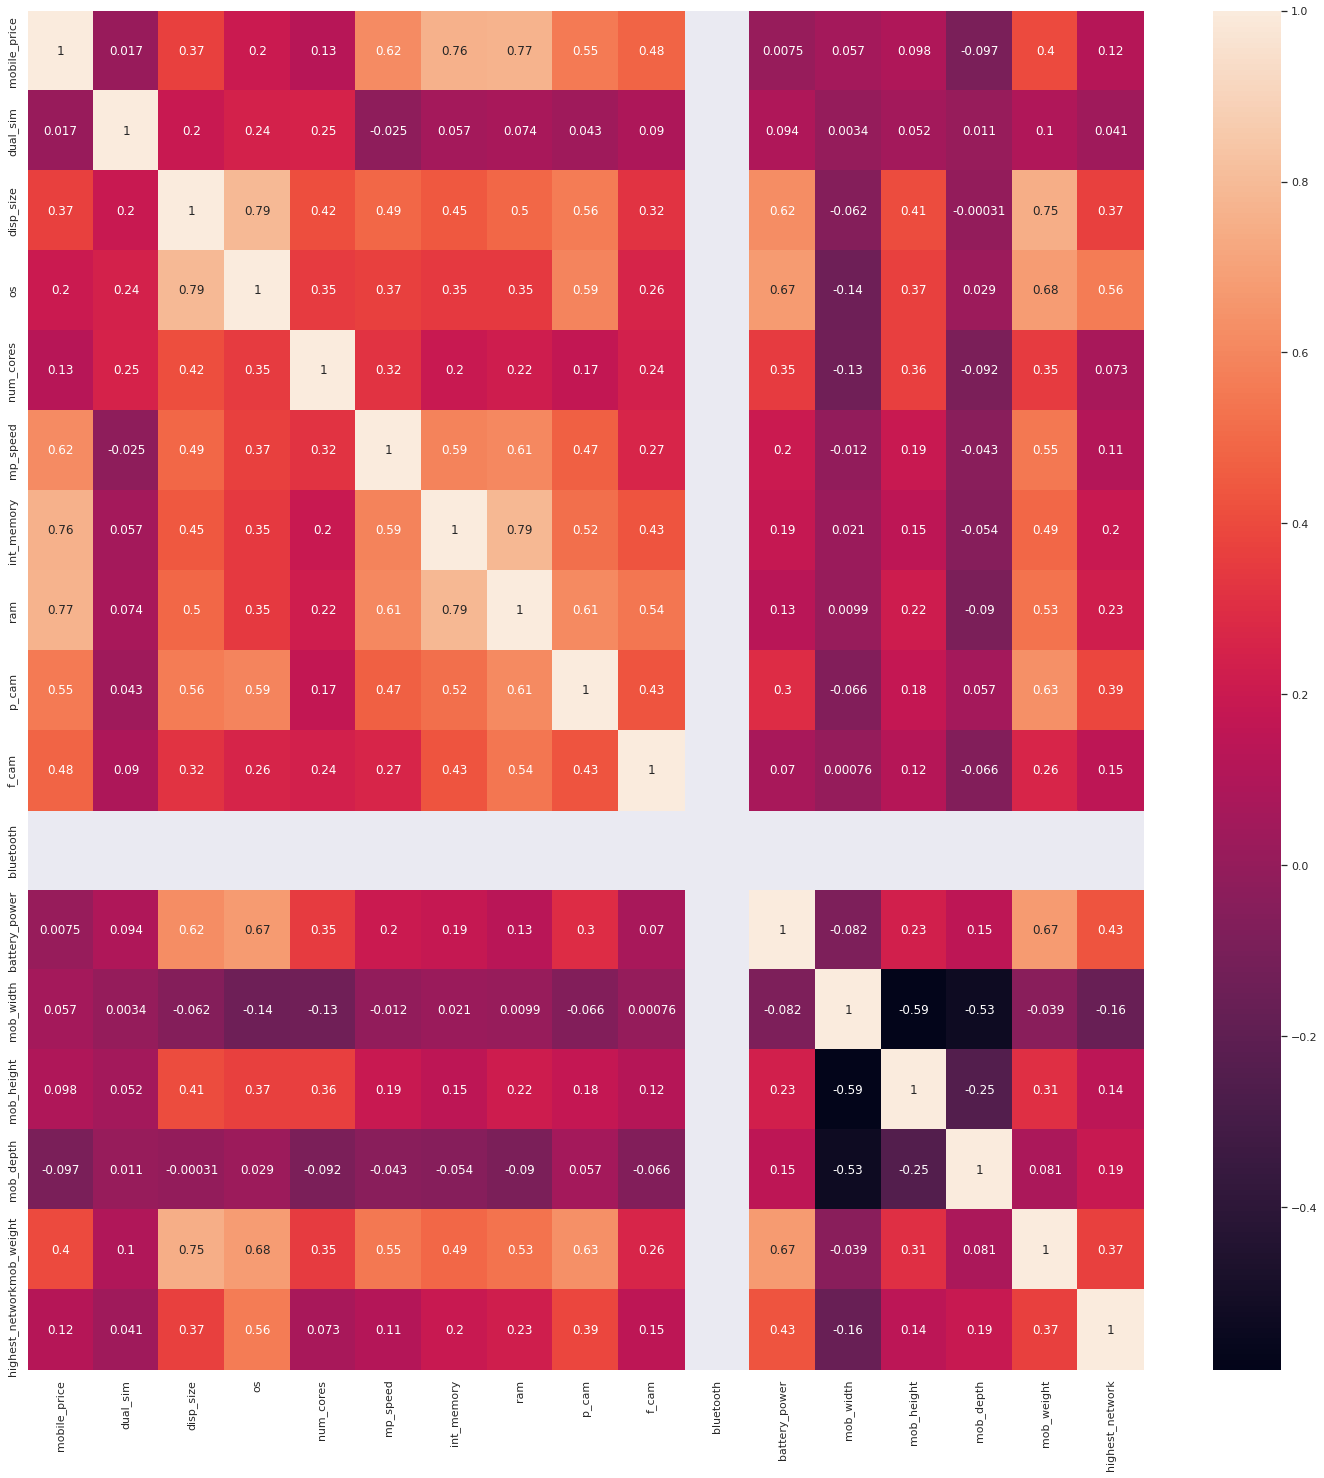

In [ ]:
sns.heatmap(df.corr(), annot = True)
sns.set(rc={'figure.figsize':(15,15)})

In [ ]:
# Getting important and correlated with target features
feat=['mp_speed','int_memory','ram','p_cam','f_cam','mob_weight']

In [ ]:
# Model building
# defining target and features
X = df[feat]
y = df['mobile_price']
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 7)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Regression models
#Linear

linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred_linear = linear.predict(X_test)
print("Linear regression Score" ,linear.score(X_test,y_test))

# Random forest
randomf = RandomForestRegressor()
randomf.fit(X_train,y_train)
print(" Random forest Score" ,randomf.score(X_test,y_test))

Linear regression Score 0.7596448136054148
 Random forest Score 0.9223895401717291
